In [30]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('customer_reviews_dataset.csv')
df.head()

,review_text,rating,review_date,variant,feedback
0,This product is amazing,4,2024-01-30,Black,This product is amazing
1,Poor quality and bad experience,2,2024-01-25,Red,Poor quality and bad experience
2,Great value for money,4,2022-03-31,Silver,Great value for money
3,Very disappointed with this product,1,2022-08-12,Blue,Very disappointed with this product
4,This product is amazing,4,2023-07-29,Blue,This product is amazing


In [32]:
len(df)

3000

In [33]:
df.describe()

,rating
count,3000.000000
mean,3.423000
std,1.287617
min,1.000000
25%,2.000000
50%,4.000000
75%,4.000000
max,5.000000


In [34]:
df['rating'].value_counts()

rating
4    871
5    740
3    605
2    486
1    298
Name: count, dtype: int64

<Axes: xlabel='rating'>

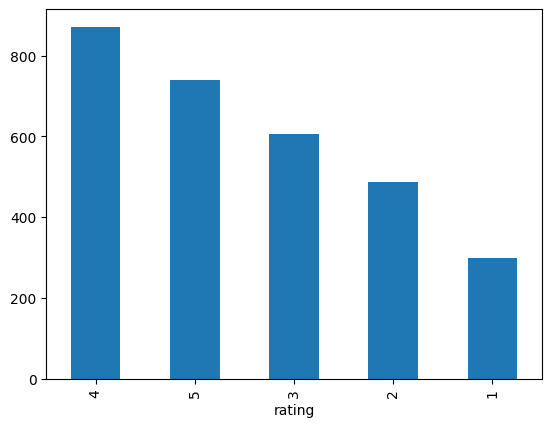

In [35]:
df['rating'].value_counts().plot(kind = 'bar')

In [36]:
df['review_length'] = df['review_text'].apply(len)

In [37]:
df.head()

,review_text,rating,review_date,variant,feedback,review_length
0,This product is amazing,4,2024-01-30,Black,This product is amazing,23
1,Poor quality and bad experience,2,2024-01-25,Red,Poor quality and bad experience,31
2,Great value for money,4,2022-03-31,Silver,Great value for money,21
3,Very disappointed with this product,1,2022-08-12,Blue,Very disappointed with this product,35
4,This product is amazing,4,2023-07-29,Blue,This product is amazing,23


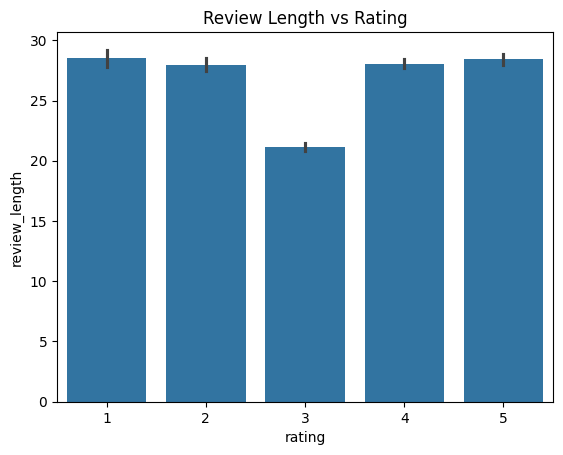

In [38]:
plt.figure()
sns.barplot(x = "rating", y = "review_length", data = df)
plt.title("Review Length vs Rating")
plt.show()

In [39]:
df['review_length'].max()

39

In [40]:
df.head(1)

,review_text,rating,review_date,variant,feedback,review_length
0,This product is amazing,4,2024-01-30,Black,This product is amazing,23


In [58]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

df["sentiment_score"] = df["review_text"].apply(lambda x : sia.polarity_scores(x)['compound'])

In [60]:
df.head(10)

,review_text,rating,review_date,variant,feedback,review_length,sentiment_score
0,This product is amazing,4,2024-01-30,Black,This product is amazing,23,0.5859
1,Poor quality and bad experience,2,2024-01-25,Red,Poor quality and bad experience,31,-0.7650
2,Great value for money,4,2022-03-31,Silver,Great value for money,21,0.7579
3,Very disappointed with this product,1,2022-08-12,Blue,Very disappointed with this product,35,-0.5256
4,This product is amazing,4,2023-07-29,Blue,This product is amazing,23,0.5859
5,Highly recommend this product,4,2023-07-13,Silver,Highly recommend this product,29,0.4201
6,Terrible performance,2,2022-10-12,Red,Terrible performance,20,-0.4767
7,Very satisfied with the quality,5,2023-12-16,Silver,Very satisfied with the quality,31,0.4754
8,Average experience,3,2022-08-09,Black,Average experience,18,0.0000
9,Stopped working after few days,2,2022-04-10,Black,Stopped working after few days,30,-0.2263


In [57]:
sia.polarity_scores(df.iloc[0]['review_text'])['compound']

0.5859

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [62]:
X = df[["review_text", "sentiment_score"]]
y = df["rating"]

In [64]:
X

,review_text,sentiment_score
0,This product is amazing,0.5859
1,Poor quality and bad experience,-0.7650
2,Great value for money,0.7579
3,Very disappointed with this product,-0.5256
4,This product is amazing,0.5859
...,...,...
2995,This product is amazing,0.5859
2996,Excellent performance and build quality,0.5719
2997,Average experience,0.0000
2998,Not worth the money,-0.1695


In [65]:
# X = df["review_text"]
# y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [77]:
preprocessor = ColumnTransformer(
    transformers=[
        ("text", TfidfVectorizer(stop_words="english", ngram_range=(1,2), max_features=7000), "review_text"),
        ("num", StandardScaler(), ["sentiment_score"])
    ]
)

model = Pipeline([
    ("features", preprocessor),
    ("classifier", LogisticRegression(multi_class="multinomial", solver="lbfgs", C=2.0, max_iter=5000))
])

In [78]:
model.fit(X_train, y_train)

e:\ML Projects\Autogen-AgentAI\venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('text',
                                                  TfidfVectorizer(max_features=7000,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words='english'),
                                                  'review_text'),
                                                 ('num', StandardScaler(),
                                                  ['sentiment_score'])])),
                ('classifier',
                 LogisticRegression(C=2.0, max_iter=5000,
                                    multi_class='multinomial'))])

In [79]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.6483333333333333

Classification Report:

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        60
           2       0.62      1.00      0.76        97
           3       1.00      1.00      1.00       121
           4       0.54      0.86      0.67       174
           5       0.47      0.14      0.22       148

    accuracy                           0.65       600
   macro avg       0.53      0.60      0.53       600
weighted avg       0.57      0.65      0.57       600



e:\ML Projects\Autogen-AgentAI\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\ML Projects\Autogen-AgentAI\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\ML Projects\Autogen-AgentAI\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [80]:
samples = [
    "Absolutely amazing product, works perfectly",
    "The product is okay, nothing special",
    "Very bad experience, waste of money"
]

In [83]:
sample_df = pd.DataFrame(
    {
        "review_text" : samples
    }
)

In [84]:
sample_df

,review_text
0,"Absolutely amazing product, works perfectly"
1,"The product is okay, nothing special"
2,"Very bad experience, waste of money"


In [85]:
sample_df["sentiment_score"] = sample_df["review_text"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [86]:
sample_df

,review_text,sentiment_score
0,"Absolutely amazing product, works perfectly",0.8516
1,"The product is okay, nothing special",-0.0920
2,"Very bad experience, waste of money",-0.7818


In [87]:
predicted_ratings = model.predict(sample_df)

In [88]:
predicted_ratings

array([4, 3, 2], dtype=int64)

In [89]:
for review, rating in zip(samples, predicted_ratings):
    print(f"Review: {review}")
    print(f"Predicted Rating: {rating}\n")

Review: Absolutely amazing product, works perfectly
Predicted Rating: 4

Review: The product is okay, nothing special
Predicted Rating: 3

Review: Very bad experience, waste of money
Predicted Rating: 2



In [42]:
# model = Pipeline([
#     ("tfidf", TfidfVectorizer(
#         stop_words="english",
#         ngram_range=(1,2),
#         max_features=5000
#     )), 
#     ("classifier", LogisticRegression(
#         max_iter=1000
#     ))
# ])

In [43]:
# model.fit(X_train, y_train)

In [44]:
# model.classes_

In [45]:
# y_preds = model.predict(X_test)

In [46]:
# print("Accuracy Score: ", accuracy_score(y_test, y_preds))
# print("classification_report: ", classification_report(y_test, y_preds))
# print("confusion_matrix: ", confusion_matrix(y_test, y_preds))

In [47]:
# labels = [1,2,3,4,5]
# cm = confusion_matrix(y_test, y_preds, labels = labels)
# plt.figure(figsize=(10,7))
# sns.heatmap(cm, annot = True,xticklabels=labels,yticklabels=labels)
# plt.xlabel("Predicted Labels")
# plt.ylabel("Actual Rating")
# plt.title("Confusion matrix")
# plt.show()

In [48]:
# new_reviews = [
#     "Absolutely amazing product, works perfectly",
#     "The product is okay, nothing special",
#     "Very bad experience, waste of money"
# ]

# model.predict(new_reviews)